In [ ]:
# prompt: import all  library for time series

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Copy of AirPassengers.csv')

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# prompt: rename passenger

data.rename(columns={'#Passengers':'Passengers'}, inplace=True)


In [ ]:
data['Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [ ]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


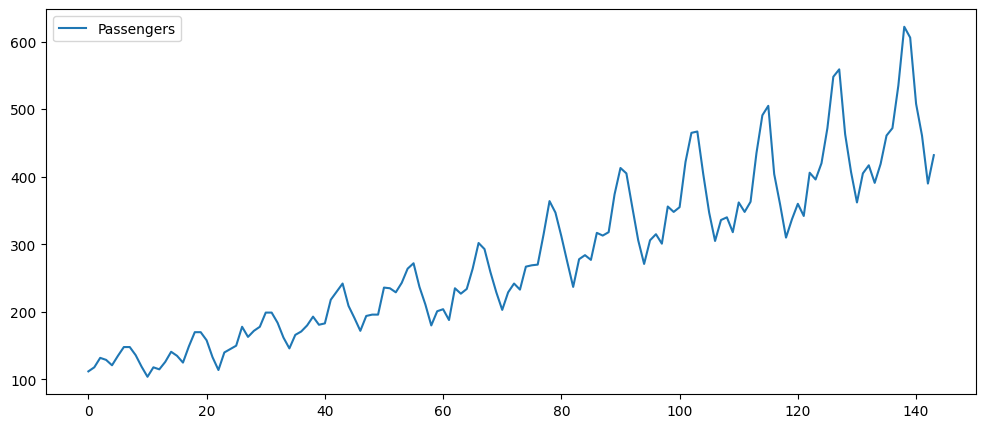

In [ ]:
# prompt: lineplot

import matplotlib.pyplot as plt
data.plot(figsize=(12,5))
plt.show()


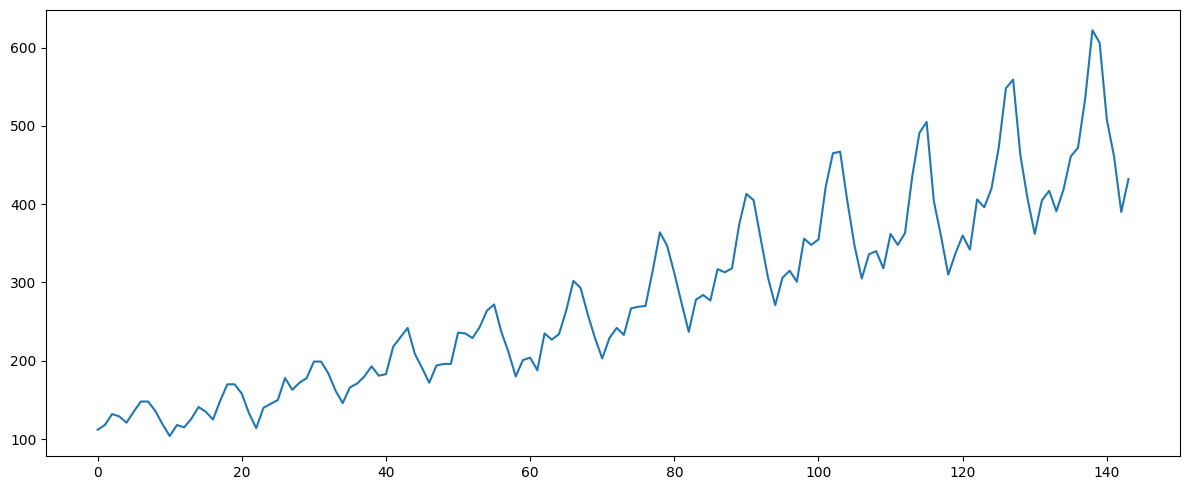

In [ ]:
# prompt: line plot tight layout

import matplotlib.pyplot as plt
data['Passengers'].plot(figsize=(12,5))
plt.tight_layout()
plt.show()


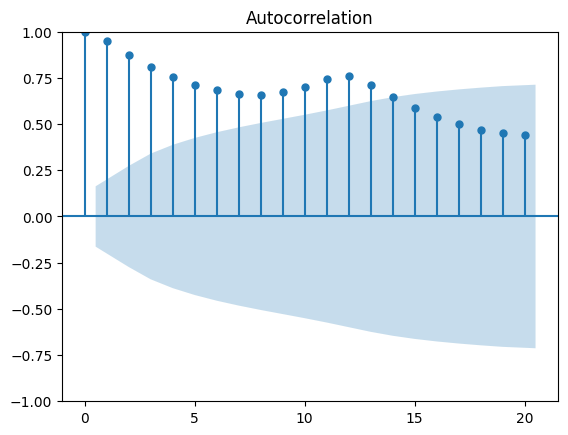

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [ ]:
# prompt: plot the autocorelation function

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Passengers'], lags=20)
plt.show()
plt.tight_layout


In [ ]:
# prompt: ADfuller test to check stationarity

import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series):
    """
    Perform Dickey-Fuller test on given time series.
    """
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adfuller_test(data['Passengers'])


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:

from statsmodels.tsa.stattools import adfuller
dftest=adfuller(data.Passengers)
print('1.ADF',dftest[0])
print('2.p-value',dftest[1])
print('3.no of lags',dftest[2])
print('1.no of observation used for ADf regression and critical value calculation',dftest[3])
print('1.critical values:')
for key,val in dftest[4].items():
  print('\t',key,':',val)

1.ADF 0.8153688792060498
2.p-value 0.991880243437641
3.no of lags 13
1.no of observation used for ADf regression and critical value calculation 130
1.critical values:
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [ ]:
data1=data.diff(periods=1)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# prompt: exlain above line

The line `data1=data.diff(periods=1)` calculates the first-order difference of the `Passengers` column in the `data` DataFrame. This means it calculates the difference between each value and the previous value in the series.

This is a common technique used in time series analysis to remove trend and seasonality from the data. By taking the difference, we are essentially removing the long-term trend and focusing on the short-term fluctuations.

Here's an example to illustrate how it works:



In [ ]:
data1

In [ ]:

dftest=adfuller(data1)
dftest[1]